<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/introduction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

### 기존 방식

In [ ]:


def celsius_to_fahrenheit(x):
  return x*1.8+32

In [ ]:
celsius_value = int(input())
print('화씨온도로', celsius_to_fahrenheit(celsius_value) )

0
화씨온도로 32.0


### 머신러닝 방식


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data_C = np.array(range(0, 100))
data_F= celsius_to_fahrenheit(data_C)
print(data_C)
print(data_F)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 32.   33.8  35.6  37.4  39.2  41.   42.8  44.6  46.4  48.2  50.   51.8
  53.6  55.4  57.2  59.   60.8  62.6  64.4  66.2  68.   69.8  71.6  73.4
  75.2  77.   78.8  80.6  82.4  84.2  86.   87.8  89.6  91.4  93.2  95.
  96.8  98.6 100.4 102.2 104.  105.8 107.6 109.4 111.2 113.  114.8 116.6
 118.4 120.2 122.  123.8 125.6 127.4 129.2 131.  132.8 134.6 136.4 138.2
 140.  141.8 143.6 145.4 147.2 149.  150.8 152.6 154.4 156.2 158.  159.8
 161.6 163.4 165.2 167.  168.8 170.6 172.4 174.2 176.  177.8 179.6 181.4
 183.2 185.  186.8 188.6 190.4 192.2 194.  195.8 197.6 199.4 201.2 203.
 204.8 206.6 208.4 210.2]


#  모델을 만들어보자

In [ ]:
model= Sequential()
model.add(InputLayer(input_shape=(1,)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()


# param 2라는 건 ax+b  a, b 두개가 있다는 거.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 만든 모델 저장하자.


model.save('./before_learning.h5')

In [ ]:
#앞에서 만든 data_c를 0~1사이의 값으로 나눈다.  적합한 값의 범위를 만들어주는 게 좋다.


scaled_data_C = data_C/100         #scaled data c는 0~1사이의 값 100개다
scaled_data_F =data_F/100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [ ]:
print(model.predict([0.01]))              #0이 아닌 첫번째 scaled data c 를 넣어봤다.
#모델을 처음만들면 b는 0, a값은 랜덤값으로 정해진다.

[[-0.01411256]]


# 입력값과 출력값, 학습횟수 넣어서 model 최적화한다 (학습시킨다)

In [ ]:
fit_hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000)    #입력데이터와 출력데이터 넣어서 학습시킨다, 1000번 공부해라

In [ ]:
#학습이후 모델 저장해보자

model.save('./after_learning.h5')

#bias는 b 0.31
#kernel은 1.79가 되어있다


In [ ]:
print(model.predict([0.01]))

[[0.33835414]]


In [ ]:
print(model.predict([0.99]))

[[2.1028376]]


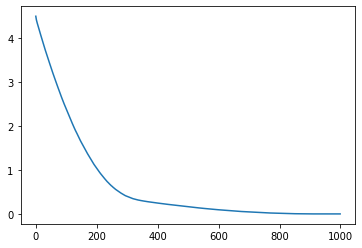

In [ ]:
plt.plot(fit_hist.history['loss'])   #학습시킨 모델의 history중 loss 오차값(손실값)의 변화 확인
plt.show()

# noise 섞인 데이터로 학습시키기

In [ ]:
#잡음이 섞여있어도 제대로 학습하는지 확인해보자.


noise = np.array(np.random.normal(0, 0.05, 100))  #평균0 표준편차 0.05인 잡음데이터 100개 만들자
print(noise)

[ 0.01750479  0.00314451 -0.04758371 -0.04943405  0.05182927  0.0389313
  0.08791917  0.04670675 -0.03020233 -0.00530779  0.03945852  0.00120499
 -0.09434857  0.03221312  0.00333801 -0.0070352   0.04749564 -0.02120718
 -0.05039684  0.07936729  0.0285044  -0.01689764 -0.08638242 -0.02305473
  0.02279069 -0.0061428  -0.04524248  0.0315425  -0.11862481  0.07292985
 -0.00081025 -0.01936584 -0.04286214 -0.12012051 -0.05320048  0.00091343
  0.03409563  0.00661919 -0.06419413  0.02011542 -0.11852823 -0.03132721
 -0.0231579   0.07667866 -0.01270477  0.08135229 -0.06276255 -0.01200194
  0.03782832 -0.06929348 -0.01440258 -0.05136028  0.07039566  0.04261681
 -0.04313691  0.10061011 -0.05575758  0.0371004   0.01127546 -0.06614854
  0.03496388  0.13832149  0.01250328 -0.0666071  -0.05924655 -0.02032586
 -0.08763099  0.0888066  -0.02307533  0.0259018   0.09417656  0.02779517
 -0.06052084 -0.02216641 -0.10574446 -0.10993353  0.07814818  0.05051955
 -0.04223233  0.00109776  0.01381206 -0.06495729 -0.

In [ ]:
noised_scaled_data_F = np.array([])
for data in scaled_data_F:   #잡음없는 원래의 데이터 꺼내서
  noised_scaled_data_F = np.append(noised_scaled_data_F, np.random.normal(0, 0.05, 100) + data)             #잡음이 섞인 데이터 100를 100개씩 더하니까 총 만개가 됨.
  #원본 출력값 하나마다 잡음 100개 더해서 100개만든거임.

  
print(len(noised_scaled_data_F))
print(noised_scaled_data_F)


print(noised_scaled_data_F[:100])

#원래 0.3정도여야하는데 첫번째 100은, 잡음 섞여서 이렇게 달라졌지.
#잡음도 정규분포 따른다.


10000
[0.30027182 0.37860679 0.33265268 ... 2.00402624 1.97377735 2.12743346]
[0.30027182 0.37860679 0.33265268 0.3089671  0.33480782 0.28777544
 0.37775724 0.37346791 0.26591062 0.34128559 0.28231079 0.29626659
 0.30374834 0.35054502 0.30995574 0.3430499  0.27791526 0.34420025
 0.24406057 0.20996831 0.31529525 0.38084683 0.29418012 0.32030821
 0.36049151 0.27840767 0.22798984 0.36325071 0.32754635 0.37908019
 0.2797683  0.33796622 0.3180488  0.30308839 0.37441891 0.29258701
 0.27214869 0.33596172 0.33405139 0.34585119 0.39033452 0.3734847
 0.25875598 0.32112181 0.26774232 0.37842427 0.36803774 0.30708588
 0.37745429 0.33523827 0.3811405  0.33910702 0.40917038 0.29124801
 0.37919501 0.35310869 0.41496183 0.26255174 0.28051639 0.42646016
 0.30116351 0.42660827 0.30353532 0.30917189 0.33932719 0.2744253
 0.28029648 0.29617726 0.30300105 0.29327202 0.29841993 0.3254726
 0.24477411 0.344739   0.39006598 0.36588366 0.26703201 0.3143027
 0.33320712 0.24078738 0.32080745 0.29165326 0.29247589

In [ ]:
noised_scaled_data_C = []
for data in range(100):  # 0~ 100이전까지 한개씩
  for i in range(100):   #처음에 0, 그다음 1이들어가면  data1일때  i는0~99이고,  0.01 백개 넣는 거임.
    noised_scaled_data_C.append(data/100)     #잡음넣지 않고 그대로 데이터 줘도 되지
noised_scaled_data_C = np.array(noised_scaled_data_C)   #np.array객체로 전환
print(len(noised_scaled_data_C))
print(noised_scaled_data_C[:101])

10000
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.01]


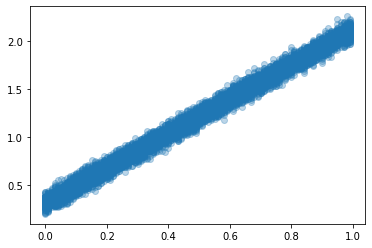

In [ ]:
plt.scatter(x=noised_scaled_data_C, y= noised_scaled_data_F, alpha= 0.3)
#입력값에 잡음섞인 출력값 100개씩 나옴.
plt.show()

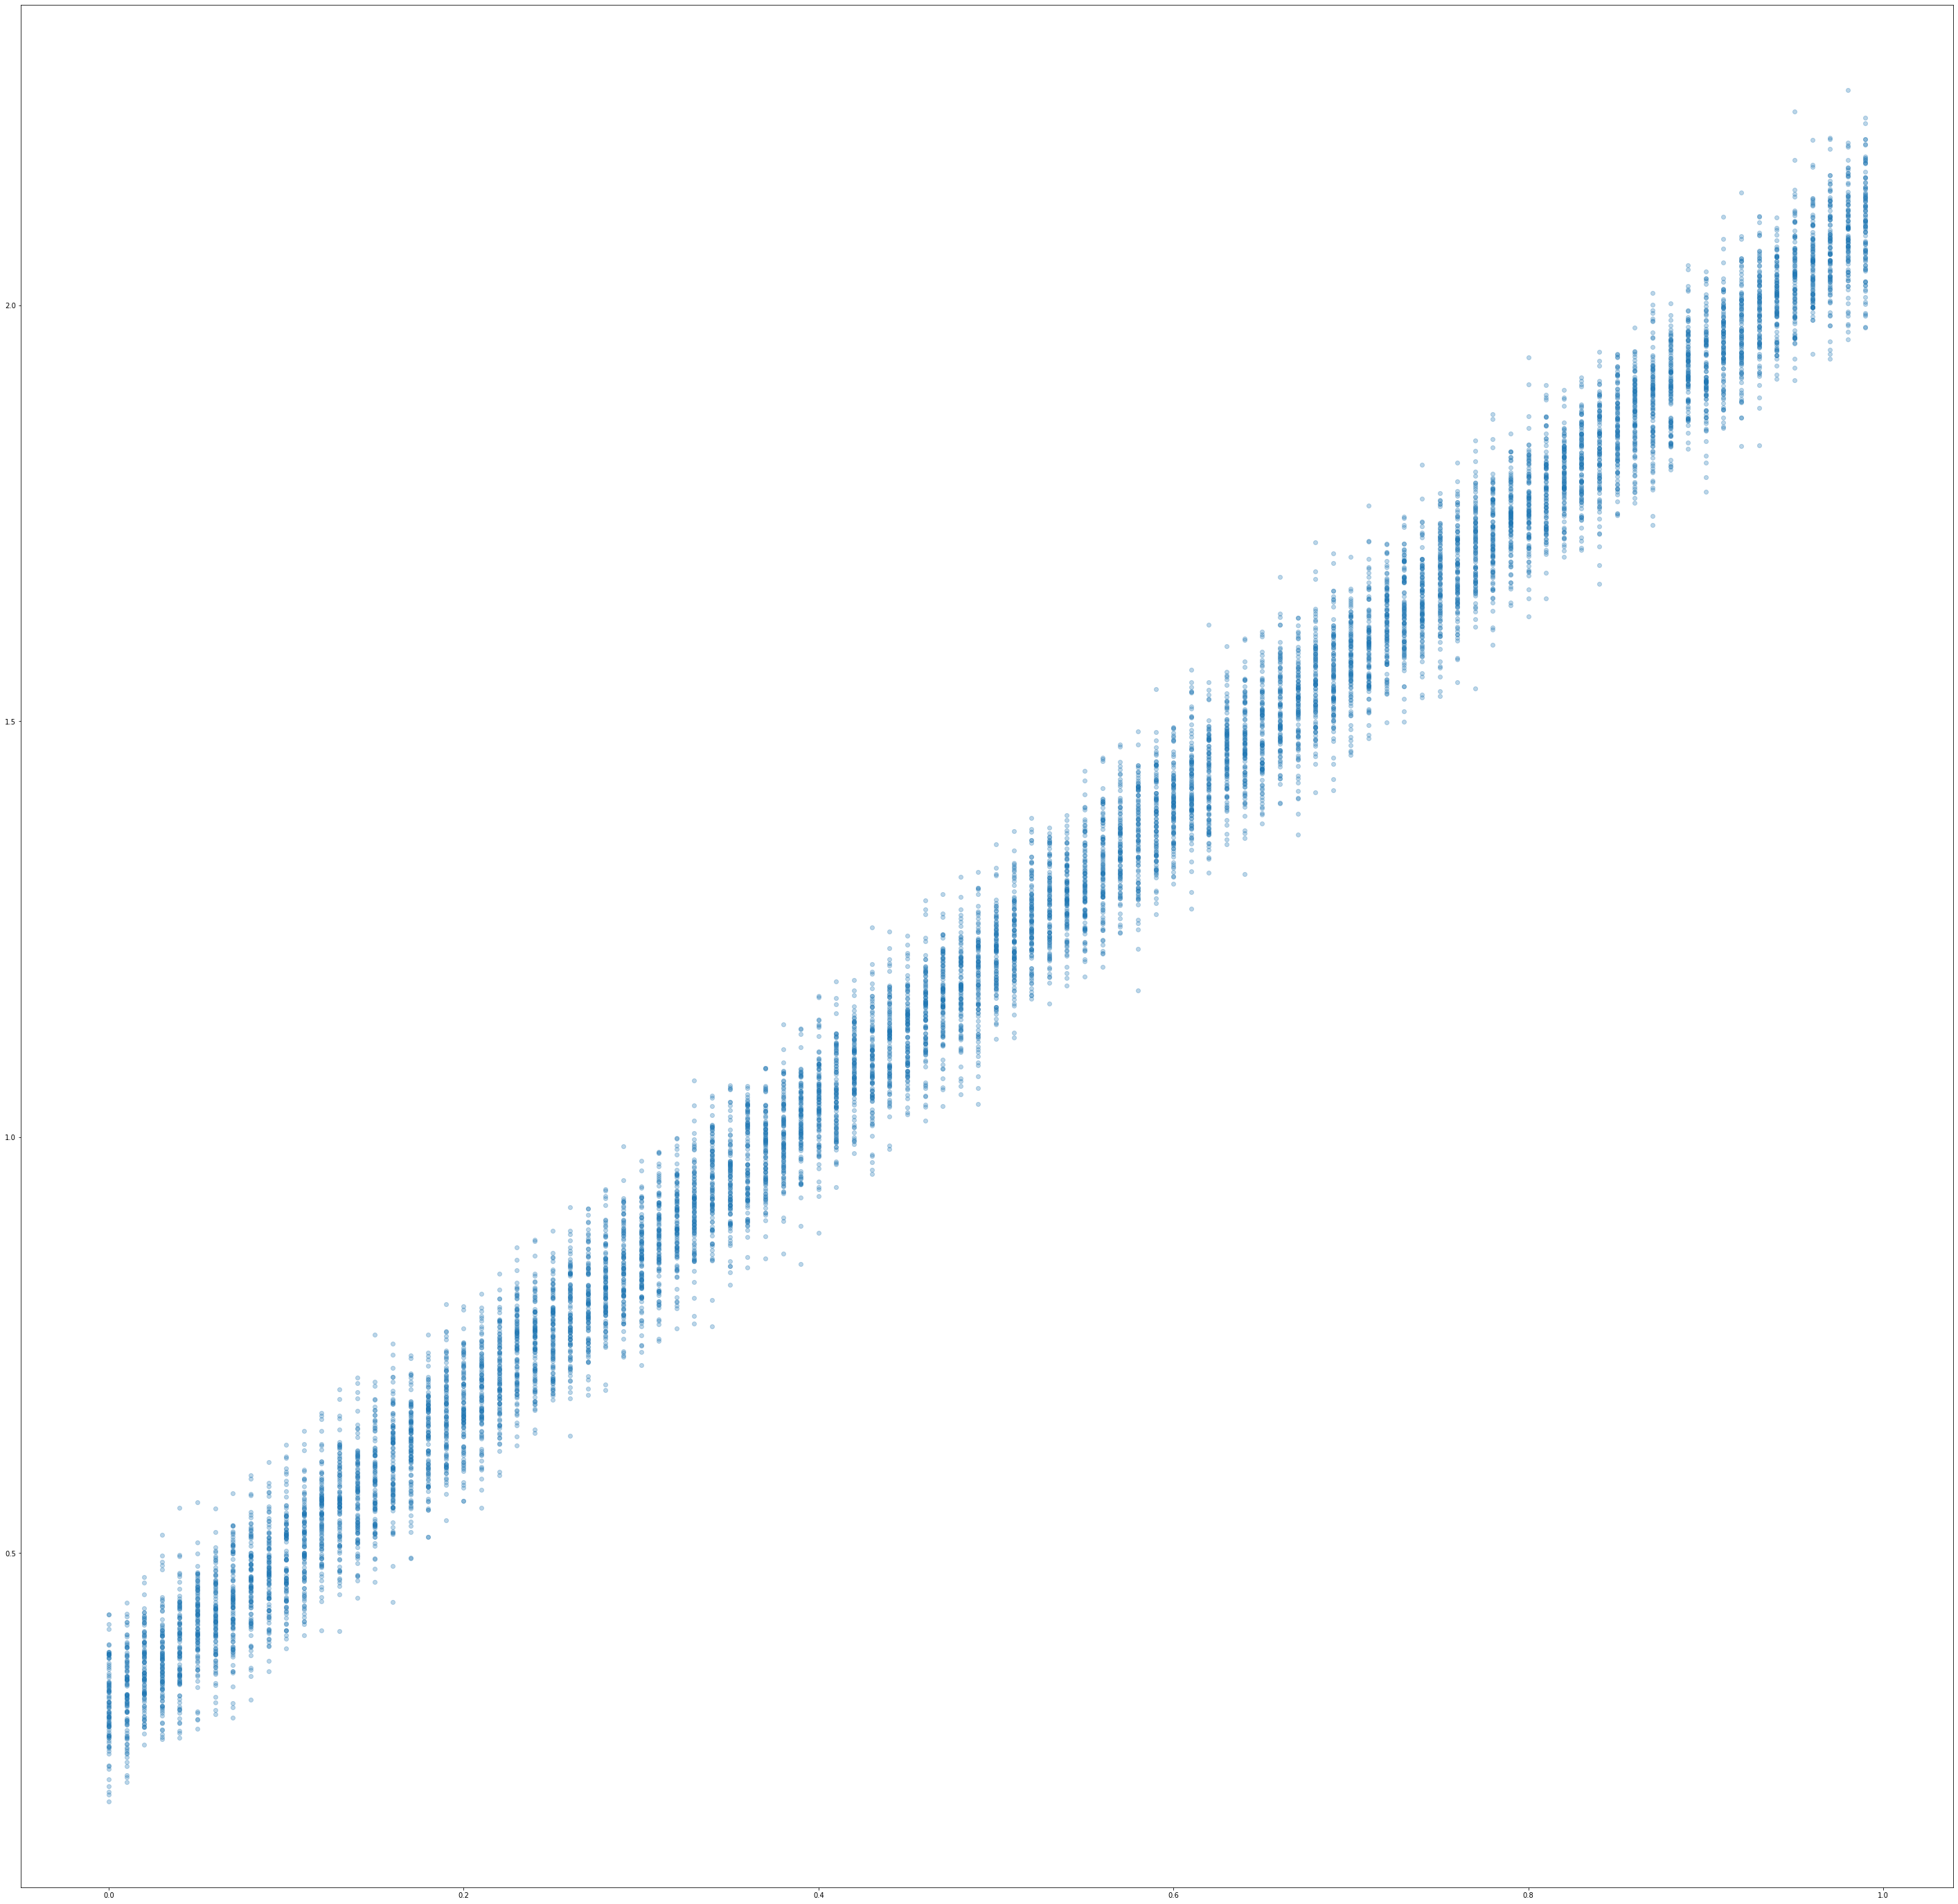

In [ ]:
fig= plt.figure(figsize=(50,50))
ax= fig.add_subplot()
ax.scatter(x=noised_scaled_data_C, y=noised_scaled_data_F, alpha=0.3)
plt.show()

# x값 하나당 y값이 100개씩 있는 거임. 

# 입력값에 노이즈섞인 출력값 100개씩 만든 걸로 모델 학습시키자

In [ ]:
model2= Sequential()
model2.add(InputLayer(input_shape=(1,)))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='rmsprop')
model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model2.predict([0.01]))

[[-0.01340923]]


In [ ]:
fit_hist= model2.fit(noised_scaled_data_C, noised_scaled_data_F, epochs=20)   #잡음이 섞인 데이터로 학습시킴
#데이터가 많으니까 학습회수 줄어도 됨


In [ ]:
model2.save('noised_after_learning.h5')

In [ ]:
print(model2.predict([0.01]))


[[0.33503953]]


In [ ]:
celsius_value = int(input())
print('화씨온도로', model2.predict([celsius_value/100])*100 )

0
화씨온도로 [[31.709316]]
